In [17]:
import matplotlib.pyplot as plt

In [89]:
path='../logs/fp/rnn_size=256-predictor-posterior-rnn_layers=2-1-n_past=2-n_future=10-lr=0.0020-g_dim=128-z_dim=64-last_frame_skip=False-beta=0.0001000/train_record.txt'
textlist=[]
with open(path) as f:
    for line in f.readlines():
        s=line.split(' ')  
        if  s[3] != 'beta1=0.9,' and s[3]!='=':          
            textlist.append(float(s[3]))  
# plt.plot(range(350),textlist)
value=0
betalist=[]
count=0
for i in range(350):
    betalist.append(value)
    value+=1/100
    if (i%100==0):
        value=0
tfrlist=[]
tfrate=1
for i in range(350):
    tfrlist.append(tfrate)
    tfrate-=1/350
psnrlist=[]
with open(path) as f:
    for i,line in enumerate(f.readlines()): 
        s=line.split(' ')  
        if i ==2 or (i-2)%7==0:
            psnrlist.append(float(s[4]))


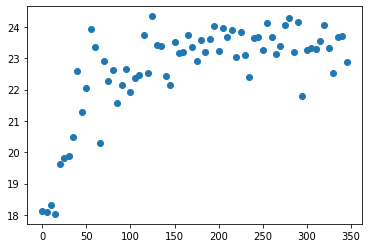

In [102]:
psnrnewlist=[]
for i in range(350):
    if (i%5==0):
       
        psnrnewlist.append(psnrlist[int(i/5)])
    else:
        psnrnewlist.append(None)
plt.scatter(range(len(psnrnewlist)),psnrnewlist)


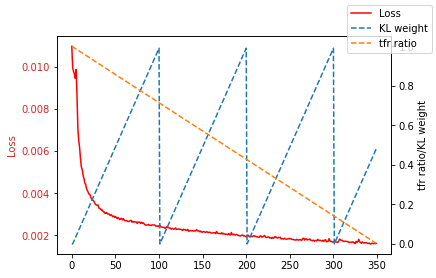

In [105]:

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(len(textlist)), textlist, label='Loss',color='red')
ax1.set_ylabel('Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax2.plot(range(len(betalist)),betalist,label='KL weight',linestyle='--')
ax2.plot(range(350),tfrlist,label='tfr ratio',linestyle='--')
ax2.set_ylabel('tfr ratio/KL weight')
fig.legend()


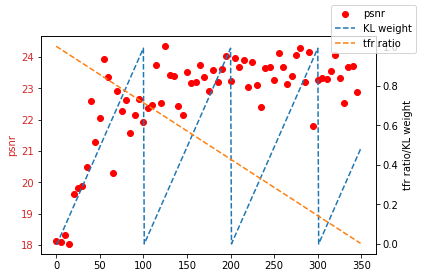

In [108]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(range(len(psnrnewlist)), psnrnewlist, label='psnr',color='red')
ax1.set_ylabel('psnr', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax2.plot(range(len(betalist)),betalist,label='KL weight',linestyle='--')
ax2.plot(range(350),tfrlist,label='tfr ratio',linestyle='--')
ax2.set_ylabel('tfr ratio/KL weight')
fig.legend()